In [41]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [42]:
conn = sqlite3.connect("../db.sqlite3")

restaurant_order = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
restaurant_orderitem = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)
restaurant_product = pd.read_sql_query("SELECT * FROM restaurant_product", conn)

conn.close()

merged_df = restaurant_order.merge(restaurant_orderitem, left_on="id", right_on="order_id")
merged_df = merged_df.merge(restaurant_product, left_on="product_id", right_on="id")
merged_df.drop(["id_x", "id_y", "order_id", "product_id", "id"], axis=1, inplace=True)

merged_df.to_csv("combined_data.csv", index=False)

df = pd.read_csv("combined_data.csv")
df

,datetime,quantity,price,name
0,2019-08-03 20:25:00,2,0.80,Plain Papadum
1,2019-08-03 20:01:00,1,0.80,Plain Papadum
2,2019-08-03 19:42:00,1,0.80,Plain Papadum
3,2019-08-03 19:41:00,2,0.80,Plain Papadum
4,2019-08-03 19:26:00,4,0.80,Plain Papadum
...,...,...,...,...
74813,2015-10-02 14:05:00,1,12.95,Kurma
74814,2016-09-02 09:53:00,1,7.90,Chicken Chaat Main
74815,2018-05-05 12:56:00,1,9.95,Mushroom - Prawn
74816,2018-05-05 12:56:00,1,9.95,Methi - Prawn


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

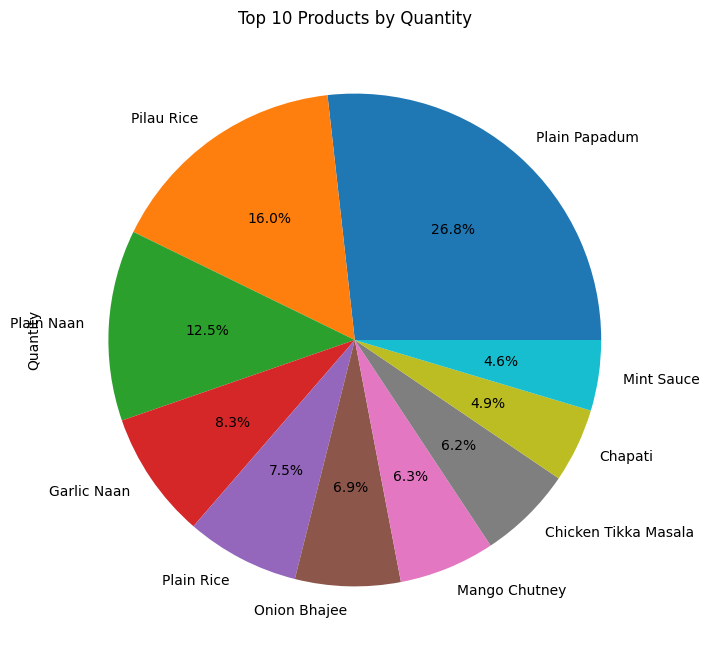

In [43]:
quantity_by_product = df.groupby("name")["quantity"].sum().sort_values(ascending=False)

top_10_products = quantity_by_product.head(10)

plt.figure(figsize=(10, 8))
top_10_products.plot.pie(autopct="%1.1f%%")
plt.title("Top 10 Products by Quantity")
plt.ylabel("Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

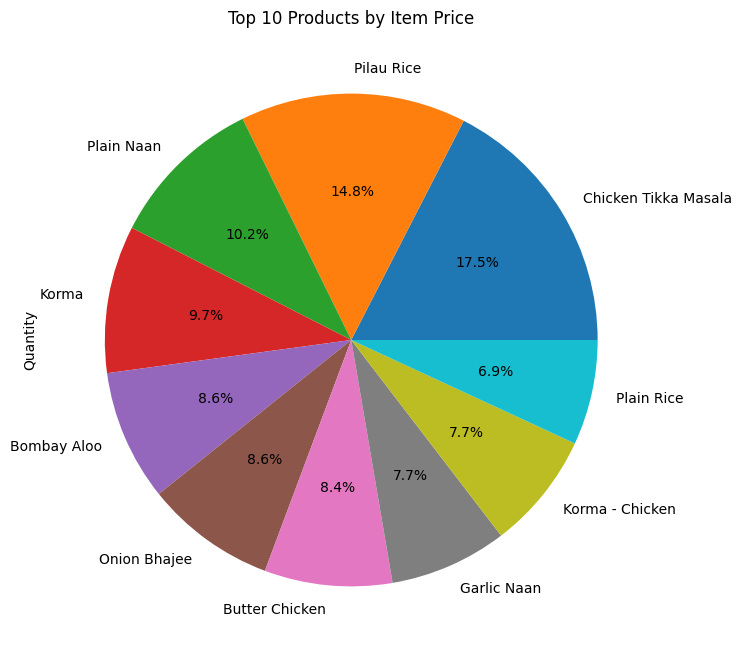

In [44]:
df["item_price"] = df["quantity"] * df["price"]

price_by_product = df.groupby("name")["item_price"].sum().sort_values(ascending=False)

top_10_price_products = price_by_product.head(10)

plt.figure(figsize=(10, 8))
top_10_price_products.plot.pie(autopct="%1.1f%%")
plt.title("Top 10 Products by Item Price")
plt.ylabel("Quantity")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

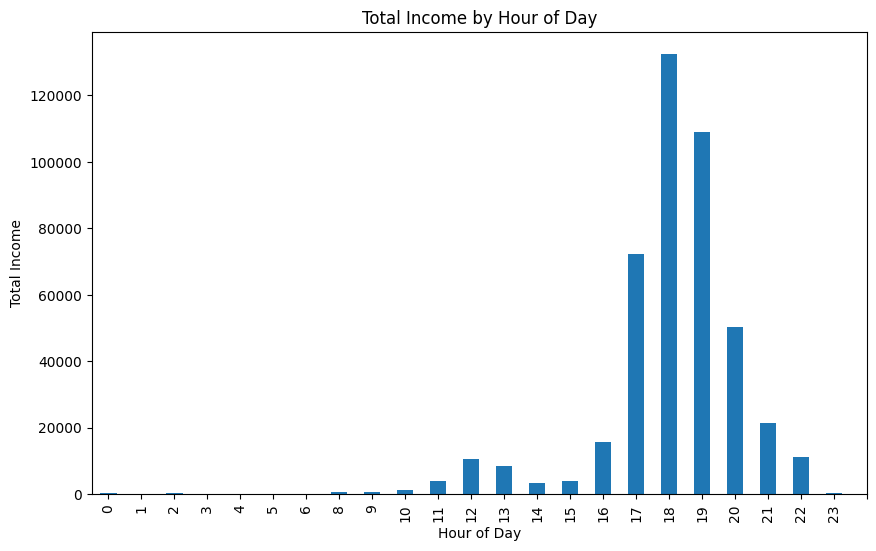

In [45]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour

income_by_hour = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(10, 6))
income_by_hour.plot.bar()
plt.title("Total Income by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Income")
plt.xticks(range(24), rotation=90)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

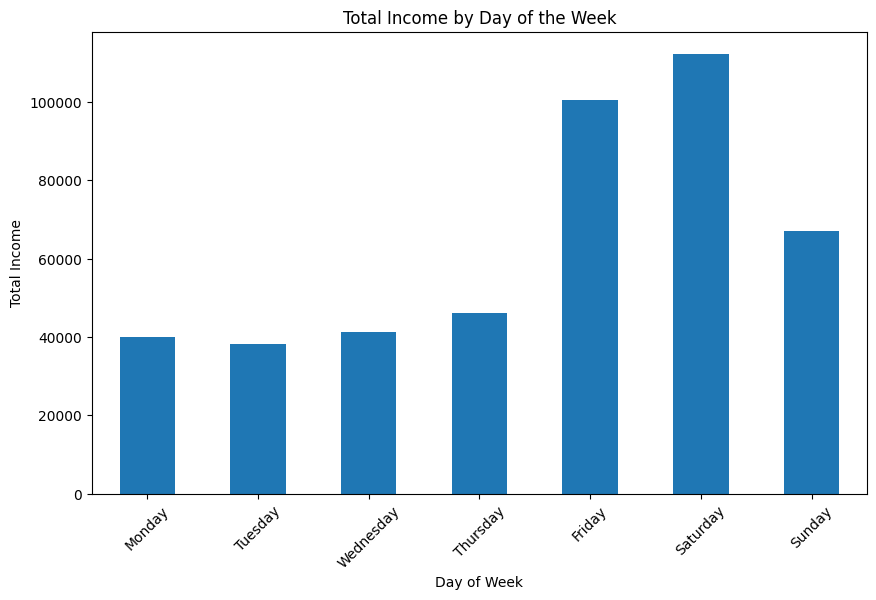

In [46]:
df["order_day_of_week"] = df["datetime"].dt.day_name()

income_by_day = df.groupby("order_day_of_week")["item_price"].sum()
income_by_day = income_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
income_by_day.plot.bar()
plt.title("Total Income by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()